In [1]:
import pandas as pd
import seaborn as sns
from IPython.display import display
import re
%matplotlib inline
import matplotlib_inline   # setup output image format
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = ['Arial Unicode MS'] 
plt.rcParams['axes.unicode_minus'] = False
sns.set_style('whitegrid',{'font.sans-serif':['Arial Unicode MS','Arial']})
from datetime import datetime

In [2]:
# read movie list
df_book = pd.read_csv('../analysis/BookDouban250.csv')

In [3]:
df_book = df_book.drop(df_book.columns[0], axis=1)
display(df_book)

,书名,豆瓣链接,作者,译者,出版社,出版日期,价格,评分,评分人数,一句话评价
0,红楼梦,https://book.douban.com/subject/1007305/,[清] 曹雪芹 著,NaN,人民文学出版社,1996-12,59.70元,9.6,413446,都云作者痴，谁解其中味？
1,活着,https://book.douban.com/subject/4913064/,余华,NaN,作家出版社,2012-8-1,20.00元,9.4,805477,生的苦难与伟大
2,1984,https://book.douban.com/subject/4820710/,[英] 乔治·奥威尔,刘绍铭,北京十月文艺出版社,2010-4-1,28.00,9.4,275446,栗树荫下，我出卖你，你出卖我
3,三体全集,https://book.douban.com/subject/6518605/,刘慈欣,NaN,重庆出版社,2012-1,168.00元,9.5,177655,地球往事三部曲
4,哈利·波特,https://book.douban.com/subject/24531956/,J.K.罗琳 (J.K.Rowling),苏农,人民文学出版社,2008-12-1,498.00元,9.7,99161,从9¾站台开始的旅程
...,...,...,...,...,...,...,...,...,...,...
245,青铜时代,https://book.douban.com/subject/1085883/,王小波,NaN,花城出版社,1997-5,29.00元,8.8,26740,唐人传奇贯注现代情趣
246,中国哲学简史,https://book.douban.com/subject/1021273/,冯友兰,赵复三,新世界出版社,2004-1,38.00元,8.9,19920,中国哲学入门书
247,坟,https://book.douban.com/subject/1974029/,鲁迅,NaN,人民文学出版社,2006-12,16.00元,9.6,11413,NaN
248,如父如子,https://book.douban.com/subject/27611824/,[日] 是枝裕和,丹勇,湖南文艺出版社,2018-4,49.80,8.9,26290,NaN


In [4]:
df_book['作者'] = df_book['作者'].fillna('Unknown')
df_book

,书名,豆瓣链接,作者,译者,出版社,出版日期,价格,评分,评分人数,一句话评价
0,红楼梦,https://book.douban.com/subject/1007305/,[清] 曹雪芹 著,NaN,人民文学出版社,1996-12,59.70元,9.6,413446,都云作者痴，谁解其中味？
1,活着,https://book.douban.com/subject/4913064/,余华,NaN,作家出版社,2012-8-1,20.00元,9.4,805477,生的苦难与伟大
2,1984,https://book.douban.com/subject/4820710/,[英] 乔治·奥威尔,刘绍铭,北京十月文艺出版社,2010-4-1,28.00,9.4,275446,栗树荫下，我出卖你，你出卖我
3,三体全集,https://book.douban.com/subject/6518605/,刘慈欣,NaN,重庆出版社,2012-1,168.00元,9.5,177655,地球往事三部曲
4,哈利·波特,https://book.douban.com/subject/24531956/,J.K.罗琳 (J.K.Rowling),苏农,人民文学出版社,2008-12-1,498.00元,9.7,99161,从9¾站台开始的旅程
...,...,...,...,...,...,...,...,...,...,...
245,青铜时代,https://book.douban.com/subject/1085883/,王小波,NaN,花城出版社,1997-5,29.00元,8.8,26740,唐人传奇贯注现代情趣
246,中国哲学简史,https://book.douban.com/subject/1021273/,冯友兰,赵复三,新世界出版社,2004-1,38.00元,8.9,19920,中国哲学入门书
247,坟,https://book.douban.com/subject/1974029/,鲁迅,NaN,人民文学出版社,2006-12,16.00元,9.6,11413,NaN
248,如父如子,https://book.douban.com/subject/27611824/,[日] 是枝裕和,丹勇,湖南文艺出版社,2018-4,49.80,8.9,26290,NaN


### Top 250  Country Distribution

In [5]:
def extract_country(name):
    if pd.isna(name):
        return None  # Return None if the value is NaN
    match = re.search(r'^\((.*?)\)|^\[(.*?)\]|^【(.*?)】|^（.*?）', name)
    if match:
        # Check if any group is not None and return the first non-None group
        for g in match.groups():
            if g is not None and g not in ['清', '明']:
                return g
    return "中国"


In [6]:
df_book['国家'] = df_book['作者'].apply(extract_country)
df_book['国家'] = df_book['国家'].replace('英', '英国')
df_book['国家'] = df_book['国家'].replace('美', '美国')
df_book['国家'] = df_book['国家'].replace('日', '日本')
df_book['国家'] = df_book['国家'].replace('德', '德国')
df_book['国家'] = df_book['国家'].replace('法', '法国')
df_book['国家'] = df_book['国家'].replace('俄', '俄罗斯')
df_book['国家'] = df_book['国家'].replace('意', '意大利')
df_book['国家'].unique()

array(['中国', '英国', '哥伦比亚', '美国', '日本', '法国', '德国', '意大利', '以色列', '俄罗斯',
       '瑞典', '葡', '印', '阿根廷', '奥', '挪', '白俄', '马来西亚', '加拿大', '南非', '古希腊',
       '苏', '澳'], dtype=object)

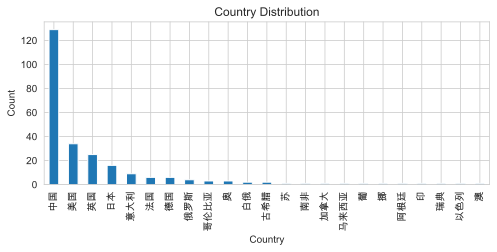

In [7]:
counts = df_book['国家'].value_counts()
# Plotting a bar chart
plt.figure(figsize=(8, 3))
counts.plot(kind='bar')
plt.title('Country Distribution')
plt.xlabel('Country')
plt.ylabel('Count')
plt.show()

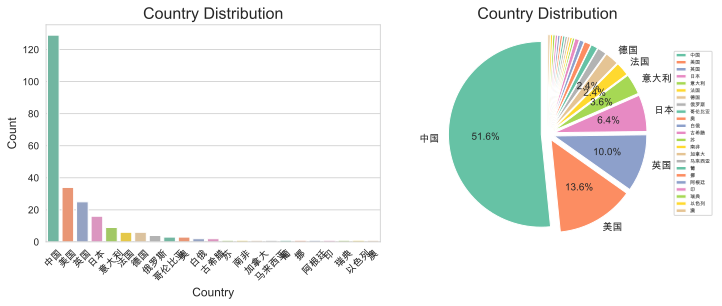

In [8]:

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

# Bar chart on the left subplot
sns.barplot(x=counts.index, y=counts.values, palette='Set2', ax=ax1)
ax1.set_title('Country Distribution', fontsize=16)
ax1.set_xlabel('Country', fontsize=12)
ax1.set_ylabel('Count', fontsize=12)
ax1.tick_params(axis='x', labelrotation=45)
ax1.tick_params(axis='both', labelsize=10)

# Pie chart on the right subplot
explode = [0.07] * len(counts)  # Optional: add explode for pie slices
wedges, texts, autotexts = ax2.pie(counts.values, labels=counts.index, autopct='%1.1f%%',
                                   startangle=90, colors=sns.color_palette('Set2'), explode=explode)

# Adjust spacing between subplots
plt.subplots_adjust(wspace=0.4)

for pct, autotext, country_label in zip(counts.values / counts.sum() * 100, autotexts, texts):
    autotext.set_horizontalalignment('center')
    if pct < 2.4:  # Hide text for small slices
        autotext.set_visible(False)
        country_label.set_visible(False)

ax2.set_title('Country Distribution', fontsize=16)
ax2.axis('equal')
ax2.legend(counts.index, loc='right', fontsize=5)

# Adjust spacing between subplots
plt.subplots_adjust(wspace=0)

# Display the merged plot
plt.show()

### Rate Analysis

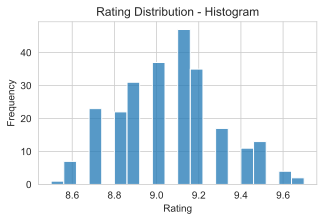

In [9]:
# Histogram
plt.figure(figsize=(5, 3))
sns.histplot(df_book['评分'], bins=20, kde=False)
plt.title('Rating Distribution - Histogram')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

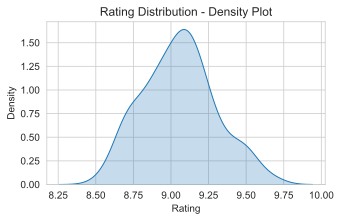

In [10]:
# Density Plot
plt.figure(figsize=(5, 3))
sns.kdeplot(df_book['评分'], fill=True)
plt.title('Rating Distribution - Density Plot')
plt.xlabel('Rating')
plt.ylabel('Density')
plt.show()

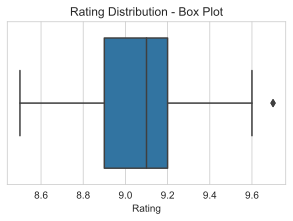

In [11]:
# Box Plot
plt.figure(figsize=(5, 3))
sns.boxplot(x=df_book['评分'])
plt.title('Rating Distribution - Box Plot')
plt.xlabel('Rating')
plt.show()

### Published Date Analysis

In [12]:
# Function to safely parse date strings
def safe_parse_date(date_str):
    date_str = date_str.replace(" ", "")
    if pd.isna(date_str) or date_str == "":
        return pd.NaT  # Return NaT for missing or empty strings
    for fmt in ("%Y-%m-%d", "%Y-%m"):
        try:
            return datetime.strptime(date_str, fmt)
        except ValueError:
            continue
    return pd.NaT  # Return NaT for strings in the wrong format

In [13]:
df_book['出版日期'].apply(safe_parse_date)


0     1996-12-01
1     2012-08-01
2     2010-04-01
3     2012-01-01
4     2008-12-01
         ...    
245   1997-05-01
246   2004-01-01
247   2006-12-01
248   2018-04-01
249   1998-07-01
Name: 出版日期, Length: 250, dtype: datetime64[ns]

In [14]:
# Apply the function to the publish_date column
df_book['publish_date_parsed'] = df_book['出版日期'].apply(safe_parse_date)
df_book['publish_date_parsed'].unique()

array(['1996-12-01T00:00:00.000000000', '2012-08-01T00:00:00.000000000',
       '2010-04-01T00:00:00.000000000', '2012-01-01T00:00:00.000000000',
       '2008-12-01T00:00:00.000000000', '2011-06-01T00:00:00.000000000',
       '2000-09-01T00:00:00.000000000', '2018-02-01T00:00:00.000000000',
       '2007-03-01T00:00:00.000000000', '1998-05-01T00:00:00.000000000',
       '1981-08-01T00:00:00.000000000', '2013-01-01T00:00:00.000000000',
       '2003-08-01T00:00:00.000000000', '1997-08-01T00:00:00.000000000',
       '1994-05-01T00:00:00.000000000', '1973-03-01T00:00:00.000000000',
       '2017-01-01T00:00:00.000000000', '2012-09-01T00:00:00.000000000',
       '2013-01-18T00:00:00.000000000', '2009-04-01T00:00:00.000000000',
       '2018-07-01T00:00:00.000000000', '2017-04-01T00:00:00.000000000',
       '1997-10-01T00:00:00.000000000',                           'NaT',
       '2010-08-01T00:00:00.000000000', '2014-11-01T00:00:00.000000000',
       '2005-01-01T00:00:00.000000000', '2006-04-01

In [15]:
# Extract year and month
df_book['publish_year'] = df_book['publish_date_parsed'].dt.year
df_book['publish_month'] = df_book['publish_date_parsed'].dt.month

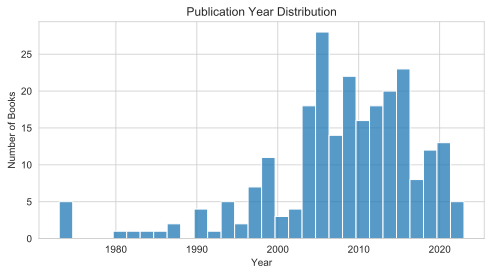

In [16]:
# Histogram for publication years
plt.figure(figsize=(8, 4))
sns.histplot(df_book['publish_year'].dropna(), bins=30, kde=False)  # Adjust bin size as needed
plt.title('Publication Year Distribution')
plt.xlabel('Year')
plt.ylabel('Number of Books')
plt.show()